Connected to jax (Python 3.11.9)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

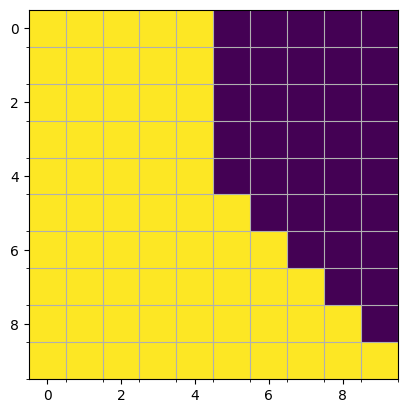

In [74]:
attn_mask = np.concatenate([np.ones((10, 5)), np.tril(np.ones((10, 5)), k=-5)], axis=-1)
plt.imshow(attn_mask)
# make grid pixel by pixel
plt.gca().set_xticks(np.arange(attn_mask.shape[1]) + 0.5, minor=True)
plt.gca().set_yticks(np.arange(attn_mask.shape[0]) + 0.5, minor=True)
plt.grid(True, which='minor')
plt.show()



In [75]:
def grid_imshow(data):
    plt.imshow(data)
    plt.gca().set_xticks(np.arange(data.shape[1]) + 0.5, minor=True)
    plt.gca().set_yticks(np.arange(data.shape[0]) + 0.5, minor=True)
    plt.grid(True, which='minor')
    plt.show()

In [76]:
x = np.concatenate([np.arange(1, 6), -np.arange(1, 6)]).reshape(-1, 1)
x = x[None].repeat(2, axis=0)
print(x.shape)

noise = np.random.rand(x.shape[0], 10)
ids_shuffle = np.argsort(noise, axis=-1)
ids_restore = np.argsort(ids_shuffle, axis=-1)

ids_shuffle.shape

(2, 10, 1)


(2, 10)

In [77]:
n_keep = 7
ids_keep = ids_shuffle[:, :7]
ids_keep_x = np.tile(ids_keep[..., None], (1, 1, x.shape[-1]))
ids_keep_a = np.tile(ids_keep[..., None], (1, 1, x.shape[1]))
print(ids_keep.shape)

x_masked = np.take_along_axis(x, ids_keep_x, axis=1)
x_masked.reshape(2, -1)

(2, 7)


array([[ 5, -3, -1,  3,  2, -5, -2],
       [ 5, -2,  3, -5, -4,  1, -3]])

In [78]:
print(np.concatenate([x_masked[0, :, 0], np.arange(10, 13)])[ids_restore[0]])
print(ids_keep[0])

[11  2  3 12  5 -1 -2 -3 10 -5]
[4 7 5 2 1 9 6]


In [79]:
ids_restore[0]

array([8, 4, 3, 9, 0, 2, 6, 1, 7, 5])

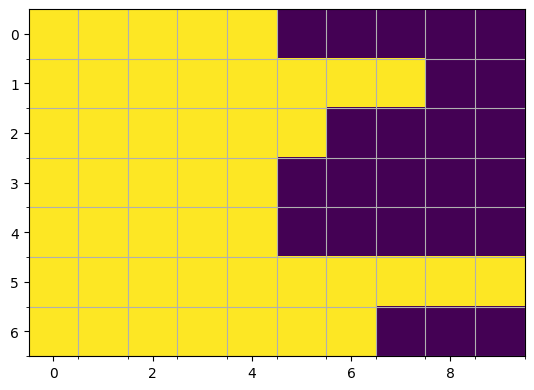

In [80]:
attn_mask_masked = np.take_along_axis(attn_mask[None], ids_keep_a, axis=1)
attn_mask_masked.shape

grid_imshow(attn_mask_masked[0])

In [81]:
attn_mask_masked = np.take_along_axis(attn_mask_masked, np.expand_dims(ids_keep, axis=-2), axis=-1)
attn_mask_masked.shape

(2, 7, 7)

[[ 5 -3 -1  3  2 -5 -2]
 [ 5 -2  3 -5 -4  1 -3]]


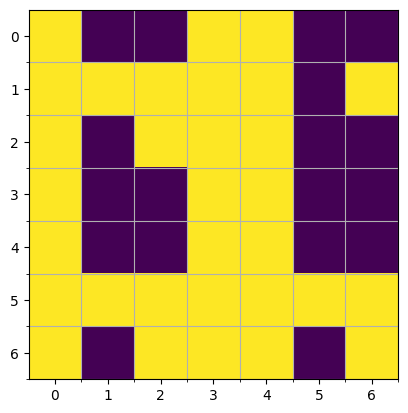

In [83]:
print(x_masked.reshape(2, -1))
grid_imshow(attn_mask_masked[0])